In [1]:
from aplf.kaggle.titanic import  graph
from distributed import Client, progress
import pandas as pd

In [2]:
from ipywidgets import interact
import numpy as np

from bokeh.io import push_notebook, show, output_notebook
from bokeh.plotting import figure
output_notebook()

Loading BokehJS ...

In [3]:
c = Client('dask-scheduler:8786')
c.restart()

Client Scheduler: tcp://dask-scheduler:8786 Dashboard: http://dask-scheduler:8787/status,Cluster Workers: 12 Cores: 144 Memory: 202.12 GB


In [4]:
train_df = c.compute(graph.train_df, sync=True)
train_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,X,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,X,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,X,S
5,6,0,3,"Moran, Mr. James",male,21.0,0,0,330877,8.4583,X,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,X,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,X,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,X,C


In [5]:
train_df['Survived'].mean()

0.3838383838383838

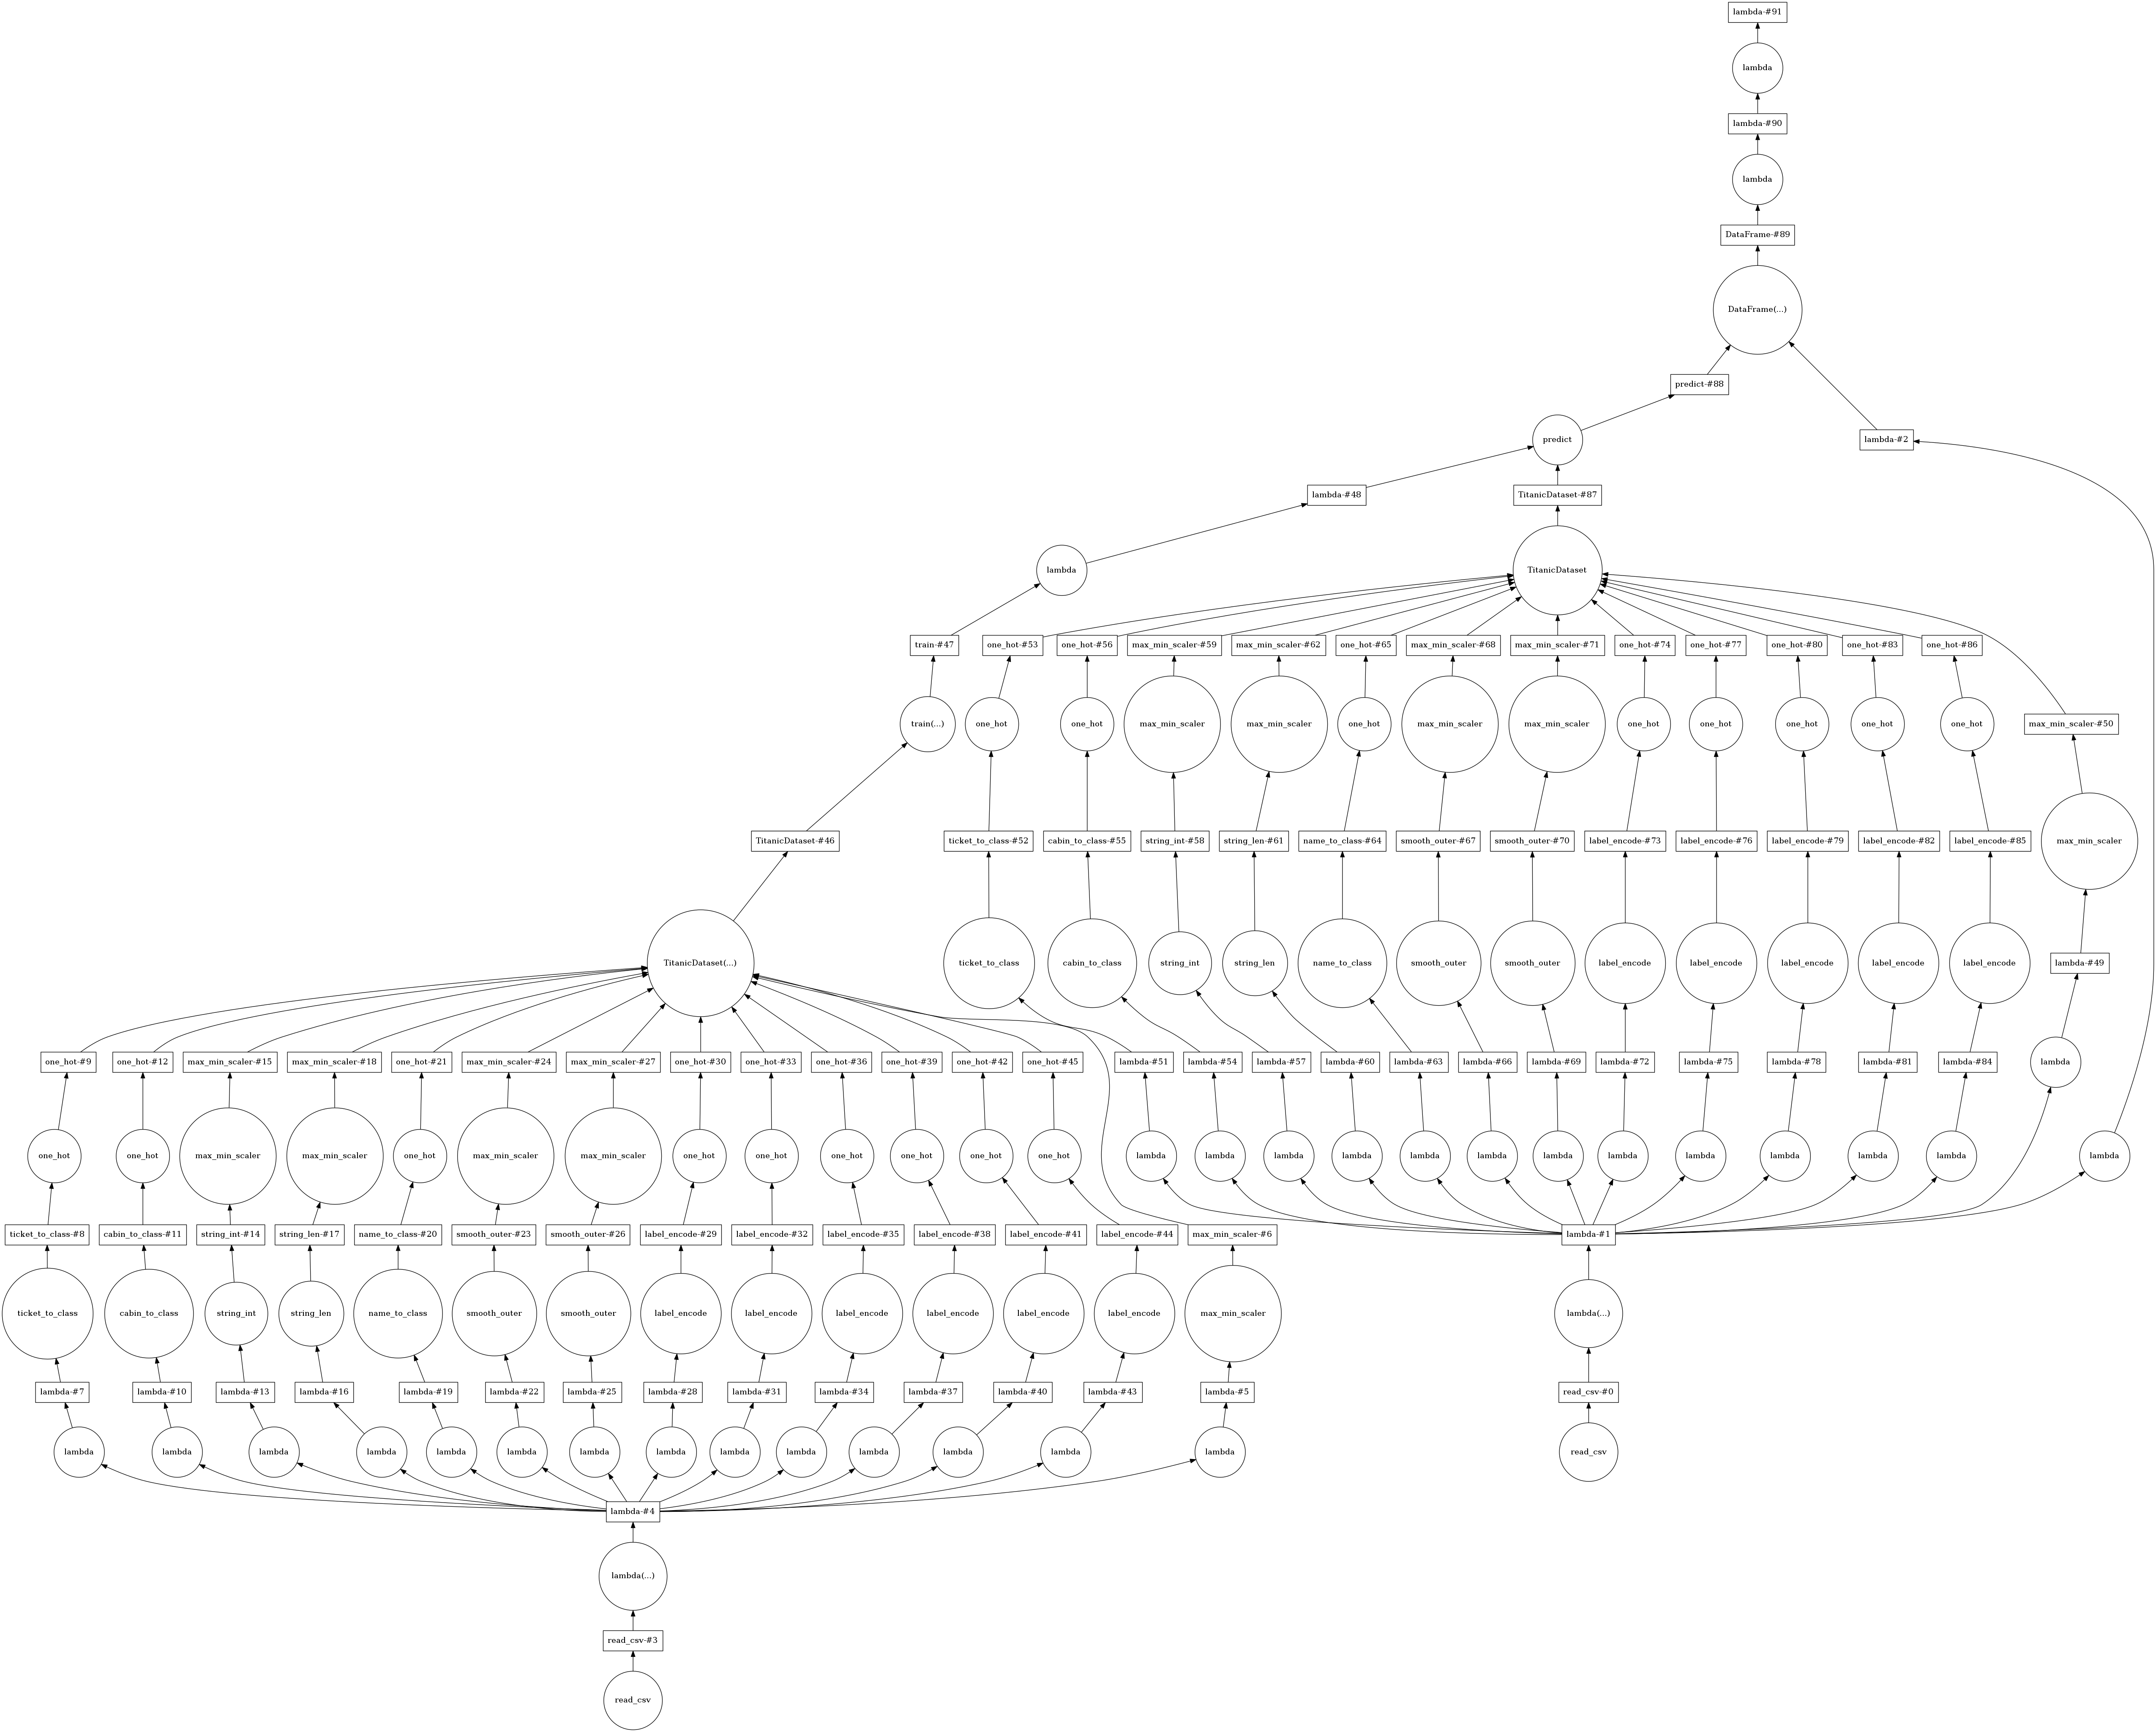

In [6]:
graph.save_submission.visualize()

In [7]:
x = graph.save_submission.persist()  # start computation in the background
progress(x)


VBox()

In [13]:
df = pd.read_json('/store/kaggle/titanic/train_loss.json')

p = figure()
p.circle(df.index, df['loss'])
show(p)

In [11]:
df = pd.read_csv('/store/kaggle/titanic/submission.csv')
df

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
5,897,0
6,898,1
7,899,0
8,900,1
9,901,0


In [12]:
df.mean()

PassengerId    1100.500000
Survived          0.375598
dtype: float64